In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

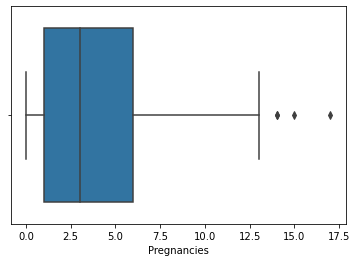

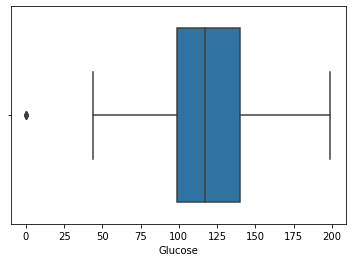

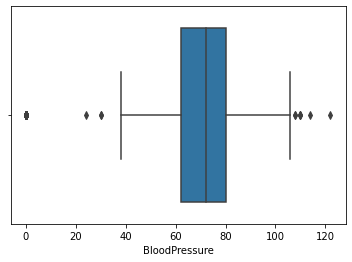

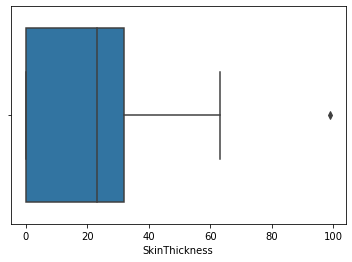

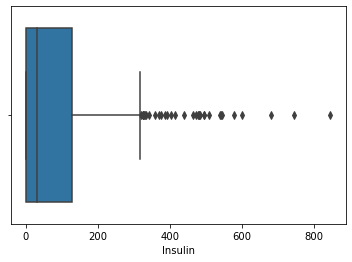

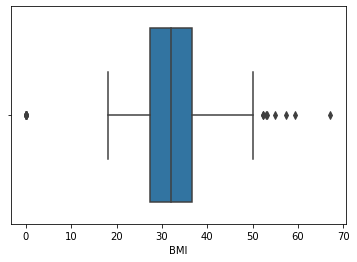

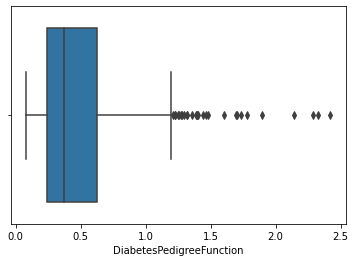

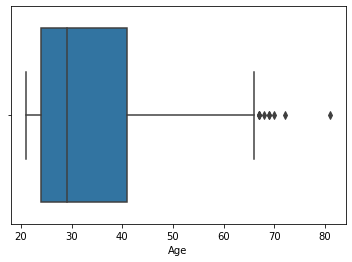

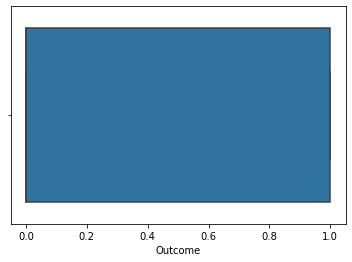

In [8]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.show()

In [9]:
# Insulin, DiabetesPedigreeFunction, BMI, Age,BloodPressure

In [12]:
d1 = df['Outcome'].value_counts()
d1

0    500
1    268
Name: Outcome, dtype: int64

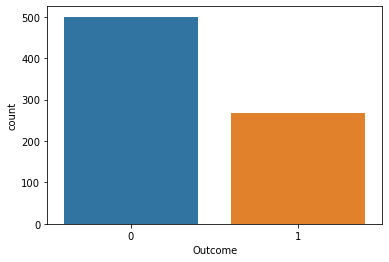

In [14]:
sns.countplot(x=df['Outcome'])
plt.show()

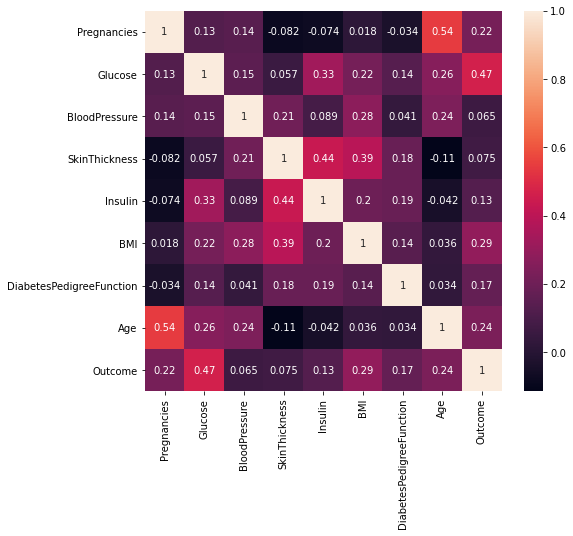

In [15]:
corr = df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True)
plt.show()

In [16]:
df.describe(percentiles=[0.02,0.03,0.97,0.98]).T

,count,mean,std,min,2%,3%,50%,97%,98%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,3.0000,11.00000,12.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,69.02000,73.01000,117.0000,187.99000,192.32000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,72.0000,94.99000,99.32000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,46.00000,48.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,369.90000,470.94000,846.00
BMI,768.0,31.992578,7.884160,0.000,19.16800,19.90100,32.0000,46.10000,47.52600,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.11902,0.12701,0.3725,1.25793,1.39066,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,29.0000,62.00000,64.66000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.00000,1.00


In [17]:
cols_with_outliers = ['Insulin', 'DiabetesPedigreeFunction', 'BMI', 'Age','BloodPressure']

In [18]:
def outlier_handling(x):
    x = x.clip(upper = x.quantile(0.98))
    x = x.clip(lower = x.quantile(0.02))
    return x

In [19]:
df[cols_with_outliers] = df[cols_with_outliers].apply(lambda x : outlier_handling(x))

# OR

# df[cols_with_outliers] = df[cols_with_outliers].apply(outlier_handling)

In [20]:
df.describe(percentiles=[0.02,0.03,0.97,0.98]).T

,count,mean,std,min,2%,3%,50%,97%,98%,max
Pregnancies,768.0,3.845052,3.369578,0.00000,0.000000,0.00000,3.0000,11.00000,12.000000,17.00000
Glucose,768.0,120.894531,31.972618,0.00000,69.020000,73.01000,117.0000,187.99000,192.320000,199.00000
BloodPressure,768.0,68.948073,19.059427,0.00000,0.000000,0.00000,72.0000,94.99000,98.871200,99.32000
SkinThickness,768.0,20.536458,15.952218,0.00000,0.000000,0.00000,23.0000,46.00000,48.000000,99.00000
Insulin,768.0,77.925833,106.823736,0.00000,0.000000,0.00000,30.5000,369.90000,468.920400,470.94000
BMI,768.0,32.167062,6.735641,19.16800,19.212880,19.90100,32.0000,46.10000,47.279160,47.52600
DiabetesPedigreeFunction,768.0,0.464689,0.299932,0.11902,0.119693,0.12701,0.3725,1.25793,1.390436,1.39066
Age,768.0,33.170000,11.545020,21.00000,21.000000,21.00000,29.0000,62.00000,64.435600,64.66000
Outcome,768.0,0.348958,0.476951,0.00000,0.000000,0.00000,0.0000,1.00000,1.000000,1.00000


In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [29]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    print('Predictions\n',y_pred)
    acc = accuracy_score(y_test,y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))
    auc_score  = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('AUC Score',auc_score)
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    plt.plot(fpr,tpr,color='blue')
    plt.plot([0,1],[0,1],label='TPR=FPR',linestyle=':',color='black')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc=8)
    plt.grid()
    plt.show()

### 1) Logistic Reg

Predictions
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 0]
Training score 0.7746741154562383
Testing score 0.7402597402597403
Accuracy_Score 0.7402597402597403
Confusion Matrix
 [[127  17]
 [ 43  44]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.72      0.51      0.59        87

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231

AUC Score 0.8208812260536

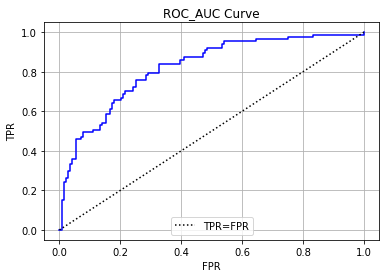

In [30]:
m1 = LogisticRegression(max_iter=1000)  # 
gen_metrics(m1,x_train,x_test,y_train,y_test)

#### 2) DecisionTree Classifier

Predictions
 [1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0
 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 1]
Training score 1.0
Testing score 0.70995670995671
Accuracy_Score 0.70995670995671
Confusion Matrix
 [[115  29]
 [ 38  49]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       144
           1       0.63      0.56      0.59        87

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

AUC Score 0.6809147509578544


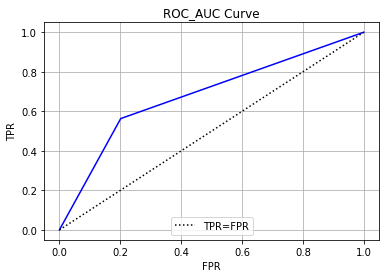

In [32]:
m2 = DecisionTreeClassifier(criterion='gini')
gen_metrics(m2,x_train,x_test,y_train,y_test)

#### 3) RandomForestClassifier

Predictions
 [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0]
Training score 0.9720670391061452
Testing score 0.7532467532467533
Accuracy_Score 0.7532467532467533
Confusion Matrix
 [[131  13]
 [ 44  43]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       144
           1       0.77      0.49      0.60        87

    accuracy                           0.75       231
   macro avg       0.76      0.70      0.71       231
weighted avg       0.76      0.75      0.74       231

AUC Score 0.8063537675606

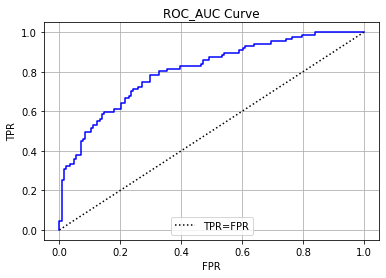

In [33]:
m3 = RandomForestClassifier(n_estimators=75,criterion='gini',max_depth=8)
gen_metrics(m3,x_train,x_test,y_train,y_test)

### AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier

Predictions
 [1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 1 0 1 1 1 0 1]
Training score 0.9981378026070763
Testing score 0.7229437229437229
Accuracy_Score 0.7229437229437229
Confusion Matrix
 [[117  27]
 [ 37  50]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       144
           1       0.65      0.57      0.61        87

    accuracy                           0.72       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.72      0.72       231

AUC Score 0.7749840357598

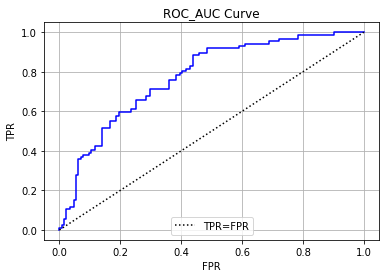

In [50]:
dt1 = DecisionTreeClassifier(max_depth=2)  # Decision Stump
m4 = AdaBoostClassifier(base_estimator=dt1,n_estimators=50,learning_rate=1)
gen_metrics(m4,x_train,x_test,y_train,y_test)